In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [4]:
!pip install tensorflow

  Using cached tensorflow-2.6.2-cp36-cp36m-manylinux2010_x86_64.whl (458.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached grpcio-1.48.2-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl
  Using cached protobuf-3.19.6-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Usin

In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')


[]

In [ ]:
!pip install opencv-python matplotlib

  Using cached opencv-python-4.11.0.86.tar.gz (95.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)

In [15]:
import cv2
import imghdr

ModuleNotFoundError: No module named 'cv2'

In [5]:
data_dir = 'emotion_classes'
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

NameError: name 'data_dir' is not defined

In [ ]:

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('emotion_classes')


Found 60973 files belonging to 28 classes.


I0000 00:00:1744638875.599516    5459 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2156 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-04-14 19:24:35.795986: W external/local_xla/xla/service/gpu/llvm_gpu_backend/default/nvptx_libdevice_path.cc:40] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykern/cuda_nvcc
  
  /usr/local/cuda
  /opt/cuda
  /home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  /home/alpha/miniconda3/envs/alphax/lib/python3.10/site-package

In [ ]:
data_iterator = data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()


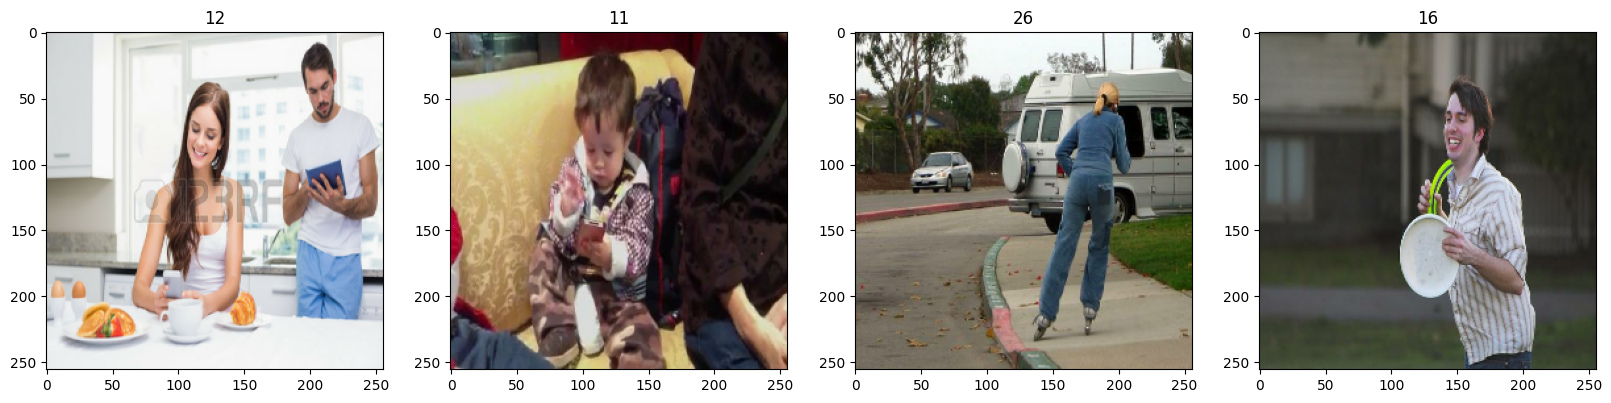

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()


(array([[[[4.64338243e-01, 3.74142170e-01, 3.11397046e-01],
          [4.38564658e-01, 3.45427394e-01, 2.81701893e-01],
          [4.70258892e-01, 3.65356922e-01, 2.98690259e-01],
          ...,
          [4.65150118e-01, 2.46507347e-01, 1.87017471e-01],
          [6.17938101e-01, 3.89506727e-01, 3.29044104e-01],
          [3.45297188e-01, 8.61519575e-02, 1.14353551e-02]],
 
         [[4.49019611e-01, 3.58823538e-01, 2.96078444e-01],
          [4.51960772e-01, 3.49999994e-01, 2.89215684e-01],
          [4.49854463e-01, 3.44952524e-01, 2.78285831e-01],
          ...,
          [3.20595890e-01, 8.12576562e-02, 3.21384817e-02],
          [4.38924640e-01, 2.09551170e-01, 1.40073523e-01],
          [3.84604782e-01, 1.34627759e-01, 3.73468138e-02]],
 
         [[4.43688720e-01, 3.45496327e-01, 2.80085772e-01],
          [4.44630831e-01, 3.42003673e-01, 2.77221203e-01],
          [4.30706203e-01, 3.25137854e-01, 2.54473031e-01],
          ...,
          [3.60784322e-01, 9.92187485e-02, 4.1452

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train_size


1334

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


model = Sequential()


In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


2025-04-14 19:25:56.525200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
E0000 00:00:1744638956.798865    6720 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1744638956.811983    6720 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2025-04-14 19:25:56.815206: W tensorflow/core/framework/op_kernel.cc

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_5459/2770033346.py", line 2, in <module>

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/home/alpha/miniconda3/envs/alphax/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_2117]